In [50]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import shutil
import time 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Gather_data Stage

#### Image Predictions

In [51]:
# For me
folder_name = 'Image_Predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [52]:
# Download image predictions.tsv file and store it to DataFrame
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
respnse = requests.get(url)
if not os.path.isfile('image-predictions.tsv'):
    with open('image-predictions.tsv', 'wb') as f:
        f.write(r.content)
image_prediction_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [8]:
# For me
path = shutil.copy('image-predictions.tsv', folder_name)

In [65]:
# Declare API keys and access tokens
consumer_key = "*************************"
consumer_secret = "*********************************************"
access_token = "**************************************************"
access_secret = "********************************************"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(parser = tweepy.parsers.JSONParser(),
                 auth_handler=auth, 
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

#### Twitter Archive Processing

In [54]:
twitter_arc = pd.read_csv('twitter-archive-enhanced.csv')

#### Twitter API and JSON

In [56]:
# Returning the IDs of tweets
tweets_list = []
# For the tweets that cannot be fount to be listed in this list
tweets_not_found = []
for tweet_id in twitter_arc['tweet_id']:
    try:
        tweets_list.append(api.get_status(tweet_id, tweet_mode = 'extended'))
    except Exception as e:
        tweets_not_found.append(tweet_id)
        print("Error on tweet id {}".format(tweet_id) + ";" + str(e))

Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 869988702071779329;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 866816280283807744;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 861769973181624320;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 856602993587888130;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 851953902622658560;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 845459076796616705;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 844704788403

Rate limit reached. Sleeping for: 301


Error on tweet id 680055455951884288;[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 409


In [57]:
print(len(tweets_list))

2331


In [58]:
print(len(tweets_not_found))

25


In [67]:
# Isolate the JSON part of each tweepy status object taht we have downloaded and add them all into a list
list_of_json = []
for each_json_tweet in tweets_list:
    list_of_json.append(each_json_tweet)

In [71]:
# write the list into txt file    
with open ('tweet_json.txt', 'w') as f:
        f.write(json.dumps(list_of_json, indent = 4))

In [72]:
# List of dictionaries 
information_list = []
with open('tweet_json.txt', encoding = 'utf-8') as json_file:
    all_information = json.load(json_file)
    for line in all_information:
        tweet_id = line['id']
        whole_tweet = line['full_text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favourite_count = line['favorite_count']
        retweet_count = line['retweet_count']
        retweeted_status = line['retweeted_status'] = line.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'
        information_list.append({
            'tweet_id': str(line['id']),
            'url': url,
            'favourite_count': int( line['favorite_count']),
            'retweet_count':int(line['retweet_count']),
            'retweeted_status': line['retweeted_status']
        })
        
        
tweet_json = pd.DataFrame(information_list, columns = ['tweet_id', 'favourite_count', 'url',
                                                       'retweet_count', 'retweeted_status'])

***

## Assess_data Stage

### Twitter Archive

#### Visual Assessment

In [42]:
twitter_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Programmatic Assessment

In [83]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [91]:
sum(twitter_arc.tweet_id.duplicated())

0

In [122]:
sum(twitter_arc.tweet_id.isnull())

0

In [89]:
twitter_arc['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Tuck         1
Noah         1
Kawhi        1
Bayley       1
Creg         1
Name: name, Length: 957, dtype: int64

In [169]:
# To get the names that starts with lowercase characters
for value in twitter_arc.name:
    if value[0].islower():
            print(value) 

such
a
quite
quite
quite
not
one
incredibly
a
mad
an
very
a
very
just
my
one
not
his
one
a
a
a
an
very
actually
a
just
getting
mad
very
this
unacceptable
all
a
old
a
infuriating
a
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
life
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
the
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
an
the
the
a
a
an
a
a
a
a


In [131]:
twitter_arc[twitter_arc.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [ ]:
# To verify the rating_numerator
twitter_arc.rating_numerator.value_counts().sort_index()

In [ ]:
print(twitter_arc.loc[twitter_arc.rating_numerator == 0, 'text'])
print(twitter_arc.loc[twitter_arc.rating_numerator == 121, 'text'])
print(twitter_arc.loc[twitter_arc.rating_numerator == 142, 'text'])
print(twitter_arc.loc[twitter_arc.rating_numerator == 144, 'text'])
print(twitter_arc.loc[twitter_arc.rating_numerator == 165, 'text'])
print(twitter_arc.loc[twitter_arc.rating_numerator == 182, 'text'])
print(twitter_arc.loc[twitter_arc.rating_numerator == 204, 'text'])
print(twitter_arc.loc[twitter_arc.rating_numerator == 420, 'text'])
print(twitter_arc.loc[twitter_arc.rating_numerator == 666, 'text'])
print(twitter_arc.loc[twitter_arc.rating_numerator == 960, 'text'])
print(twitter_arc.loc[twitter_arc.rating_numerator == 1776, 'text'])

In [ ]:
print(twitter_arc['text'][315])
print(twitter_arc['text'][1016])
print(twitter_arc['text'][1635])
print(twitter_arc['text'][1779])
print(twitter_arc['text'][902])
print(twitter_arc['text'][290])
print(twitter_arc['text'][1120])
print(twitter_arc['text'][188])
print(twitter_arc['text'][2074])
print(twitter_arc['text'][189])
print(twitter_arc['text'][313])
print(twitter_arc['text'][979])

In [ ]:
# To verify the rating_denominator
twitter_arc.rating_denominator.value_counts().sort_index()

In [140]:
print(twitter_arc.loc[twitter_arc.rating_denominator == 0, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 2, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 7, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 11, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 15, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 16, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 20, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 40, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 50, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 70, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 80, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 90, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 110, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 120, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 130, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 150, 'text'])
print(twitter_arc.loc[twitter_arc.rating_denominator == 170, 'text'])

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
1165    Happy 4/20 from the squad! 13/10 for all https...
1598    Yes I do realize a rating of 4/20 would've bee...
Name: text, dtype: object
1433    Happy Wednesday here's a bucket of pups. 44/40...
Name: text, dtype: object
1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I

In [141]:
print(twitter_arc['text'][313]) # tweet to explain actual ratings (delete)
print(twitter_arc['text'][2335]) # actual rating is 9/10
print(twitter_arc['text'][516]) # no_rating (delete this row)
print(twitter_arc['text'][784]) # (delete this retweet)
print(twitter_arc['text'][1068]) # actual rating is 14/10 
print(twitter_arc['text'][1662]) # actual rating is 10/10
print(twitter_arc['text'][342]) # no_rating (delete this row)
print(twitter_arc['text'][1663]) 
print(twitter_arc['text'][1165]) # actual rating is 13/10
print(twitter_arc['text'][1598])
print(twitter_arc['text'][1433])
print(twitter_arc['text'][1202]) # actual rating 11/10
print(twitter_arc['text'][1274])
print(twitter_arc['text'][1351])
print(twitter_arc['text'][433])
print(twitter_arc['text'][1254])
print(twitter_arc['text'][1843])
print(twitter_arc['text'][1228])
print(twitter_arc['text'][1635])
print(twitter_arc['text'][1779])
print(twitter_arc['text'][1634])
print(twitter_arc['text'][902])
print(twitter_arc['text'][1120])

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
@docmisterio account started on 11/15/15
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irrespo

In [133]:
# Number of records whose both doggo and floofer columns are not None
len(twitter_arc[(twitter_arc.doggo != 'None') & (twitter_arc.floofer != 'None')])

1

In [134]:
# Number of records whose both pupper and puppo columns are not None
len(twitter_arc[(twitter_arc.pupper != 'None') & (twitter_arc.puppo != 'None')])

0

In [135]:
# Number of records whose both pupper and floofer columns are not None
len(twitter_arc[(twitter_arc.pupper != 'None') & (twitter_arc.floofer != 'None')])

0

In [136]:
# Number of records whose both doggo and puppo columns are not None
len(twitter_arc[(twitter_arc.doggo != 'None') & (twitter_arc.puppo != 'None')])

1

In [137]:
# Number of records whose both doggo and pupper columns are not None
len(twitter_arc[(twitter_arc.doggo != 'None') & (twitter_arc.pupper != 'None')])

12

In [171]:
# Number of records whose both floofer and puppo columns are not None
len(twitter_arc[(twitter_arc.floofer != 'None') & (twitter_arc.puppo != 'None')])

0

In [201]:
# To check for the rows that are retweets
sum(twitter_arc_clean.retweeted_status_id.notnull())

181

In [330]:
# To check for the rating_numerator that have decimals  Source:https://github.com/gouravaich/wrangle-analyze-weratedogs-twitter/blob/master/Solution.ipynb
with pd.option_context('max_colwidth', 200):
    display(twitter_arc[twitter_arc['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\mohammed hani\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


### Image Prediction

#### Visual Assessment

In [1436]:
image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Programmatic Assessment

In [144]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [147]:
sum(image_prediction_df.jpg_url.duplicated()) # Drop these duplicates

66

In [150]:
# Check if there are any records in arc_df whose corresponding record with same tweet_id is missing in img_df table
len(twitter_arc[~twitter_arc.tweet_id.isin(image_prediction_df.tweet_id)])

281

### Twitter_JSON

#### Visual Assessment

In [43]:
tweet_json

,tweet_id,favourite_count,url,retweet_count,retweeted_status
0,892420643555336193,35379,https://t.co/MgUWQ76dJU,7469,Original tweet
1,892177421306343426,30610,https://t.co/0Xxu71qeIV,5545,Original tweet
2,891815181378084864,23029,https://t.co/wUnZnhtVJB,3671,Original tweet
3,891689557279858688,38665,https://t.co/tD36da7qLQ,7643,Original tweet
4,891327558926688256,36947,https://t.co/AtUZn91f7f,8242,Original tweet
...,...,...,...,...,...
2326,666049248165822465,96,https://t.co/4B7cOc1EDq,39,Original tweet
2327,666044226329800704,265,https://t.co/DWnyCjf2mx,124,Original tweet
2328,666033412701032449,109,https://t.co/y671yMhoiR,39,Original tweet
2329,666029285002620928,119,https://t.co/r7mOb2m0UI,41,Original tweet


#### Programmatic Assessment

In [925]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favourite_count   2331 non-null   int64 
 2   url               2331 non-null   object
 3   retweet_count     2331 non-null   int64 
 4   retweeted_status  2331 non-null   object
dtypes: int64(2), object(3)
memory usage: 91.2+ KB


## Quality

##### Twitter_Archive 

1. Erroneous datatypes(`in_reply_to_status_id`,`in_reply_to_user_id`,`timestamps`)
2. Deleting the retweet rows, therefore deleting duplicates
3. About 281 `tweet_id` in `Twitter_archive` are missing in `image_prediction`
4. Drop the retweet columns and columns taht will not be used for analysis
5. Modify the `rating_numerator` and `rating_denominator` columns (correct and drop)
6. Correct the type of `rating_numerator` and `rating_denominator` to allow for decimals
7. Erroneous dog `name` that starts with lowercase characters
8. The tags of html in the `source` column to be deleted
9. The column of `dog_stage` should has a type of categorical
10. The columns that have more than one dog stage (to be solved in the tidiness process number 2)

##### Image_Prediction 

1. Drop the 66 duplicated values of `jpg_url` column
2. Erroneous datatypes(`confidence_level`)

##### Twitter_JSON

1. Drop the rows that do not have retweeted status of `Original tweet` (duplicated)
2. Erroneous datatype(`tweet_id`)

##### Twitter_Prediction_Json

1. Erroneous datatypes(`date`)

## Tidiness

##### Twitter_Archive 

1. Timestamp columns should be seperaed into four columns (date, exact_hour, exact_minute, and exact_second)
2. The columns (doggo, floofer,	pupper,	puppo) should be marged into one column named `dog_stage`
3. Merging `rating_numerator` and `rating_denominator` columns into one column `rating(out_of_10_per_dog)`
4. `dog_breed` and `confidence` columns should be added to the `twitter_arc` table based on the predictions in the `image_prediction_df` table 
5. All tables to be merged together in one table

***

## Clean_stage Process

In [127]:
twitter_arc_clean = twitter_arc.copy()
image_prediction_df_clean = image_prediction_df.copy()
tweet_json_clean = tweet_json.copy()

## Quality

### Twitter_arc

1. Erroneous datatypes(`in_reply_to_status_id`,`in_reply_to_user_id`,`timestamps`, `retweeted_status_timestamps`)

###### Define

Convert (in_reply_to_status_id,in_reply_to_user_id,timestamps, retweeted_status_timestamps) into the correct types usin `astype`

###### Code

In [128]:
# To integers
twitter_arc_clean.in_reply_to_status_id = twitter_arc_clean.in_reply_to_status_id.fillna(0)
twitter_arc_clean.in_reply_to_user_id = twitter_arc_clean.in_reply_to_user_id.fillna(0)

twitter_arc_clean.in_reply_to_status_id = twitter_arc_clean.in_reply_to_status_id.astype(np.int64)
twitter_arc_clean.in_reply_to_user_id = twitter_arc_clean.in_reply_to_user_id.astype(np.int64)
# To datetime
twitter_arc_clean.timestamp = pd.to_datetime(twitter_arc_clean.timestamp)
twitter_arc_clean.retweeted_status_timestamp = pd.to_datetime(twitter_arc_clean.retweeted_status_timestamp)

###### Test

In [1372]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       2356 non-null   int64              
 2   in_reply_to_user_id         2356 non-null   int64              
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

2. Deleting retweet rows, therefore deleting duplicates

###### Define

We will get the rows with NaN values in the `retweeted_status_id` column

###### Code

In [129]:
# We only keep the records that are not reweets and drop the rest
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean.retweeted_status_id.isnull()]

##### Test

In [1071]:
len(twitter_arc_clean[twitter_arc_clean.retweeted_status_id.notnull()])

0

3. About 281 id in `Twitter_archive` are missing in `image_prediction`

###### Define

We will keep only the records that exist in `Twitter_archive` and `image_prediction`

###### Code

In [130]:
# we need to keep the records that exist in both dataframes and drop the rest
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean.tweet_id.isin(image_prediction_df_clean.tweet_id)]

##### Test

In [1073]:
len(twitter_arc_clean[~twitter_arc_clean.tweet_id.isin(image_prediction_df_clean.tweet_id)]) 

0

4. Drop the retweet columns and columns taht will not be used for analysis

###### Define

We will `drop` the columns of retweets and the columns that will not be used for our analysis to make the final table more clear

###### Code

In [131]:
# Drop the column that we will not use in the analysis
twitter_arc_clean = twitter_arc_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_id',
                                           'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'],
                                           axis = 1)

##### Test

In [1075]:
twitter_arc_clean.shape

(1994, 11)

In [1076]:
list(twitter_arc_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

5. Modify the `rating_numerator` and `rating_denominator` columns (correct and drop)

###### Define

We will update the values that are incorrect and remove the ones that have incorrect or do not have ratings

###### Code

In [132]:
# Modify the numertaors and denominators 
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 740373189193256964),'rating_numerator'] = 14
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 740373189193256964),'rating_denominator'] = 10

twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 722974582966214656),'rating_numerator'] = 13
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 722974582966214656),'rating_denominator'] = 10

twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 716439118184652801),'rating_numerator'] = 11
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 716439118184652801),'rating_denominator'] = 10

twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 682962037429899265),'rating_numerator'] = 10
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 682962037429899265),'rating_denominator'] = 10

twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 666287406224695296),'rating_numerator'] = 9
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 666287406224695296),'rating_denominator'] = 10

###### Test

In [1078]:
for value in twitter_arc_clean.rating_denominator:
    if value != 10:
       print(twitter_arc_clean[twitter_arc_clean['rating_denominator'] == value])

               tweet_id                 timestamp  \
433  820690176645140481 2017-01-15 17:52:40+00:00   

                                                source  \
433  <a href="http://twitter.com/download/iphone" r...   

                                                  text  rating_numerator  \
433  The floofs have been released I repeat the flo...                84   

     rating_denominator  name doggo floofer pupper puppo  
433                  70  None  None    None   None  None  
               tweet_id                 timestamp  \
516  810984652412424192 2016-12-19 23:06:23+00:00   

                                                source  \
516  <a href="http://twitter.com/download/iphone" r...   

                                                  text  rating_numerator  \
516  Meet Sam. She smiles 24/7 &amp; secretly aspir...                24   

     rating_denominator name doggo floofer pupper puppo  
516                   7  Sam  None    None   None  None  
            

In [1272]:
# OR
with pd.option_context('max_colwidth', 200):
    display(twitter_arc_clean[twitter_arc_clean['rating_denominator'] != 10][['tweet_id','text','rating_numerator',
                                                                              'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130


6. Correct the type of `rating_numerator` and `rating_denominator` to allow for decimals

###### Define

We will change the type of `rating_numerator` and `rating_denominator` from integers to floats and allow for decimals

###### Code

In [133]:
# Change the class to floats to allow for decimals
twitter_arc_clean.rating_numerator = twitter_arc_clean.rating_numerator.astype(float)
twitter_arc_clean.rating_denominator = twitter_arc_clean.rating_denominator.astype(float)

In [134]:
# Modify the records of the selected ids
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_arc_clean.loc[(twitter_arc_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

###### Test

In [1083]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   float64            
 5   rating_denominator  1994 non-null   float64            
 6   name                1994 non-null   object             
 7   doggo               1994 non-null   object             
 8   floofer             1994 non-null   object             
 9   pupper              1994 non-null   object             
 10  puppo               1994 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(7)
memory usage: 186.9+ KB


In [1084]:
with pd.option_context('max_colwidth', 200):
    display(twitter_arc_clean[twitter_arc_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\mohammed hani\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


7. Erroneous dog `name` that starts with lowercase characters

###### Define

`replace` all lowercase values with 'None'

###### Code

In [135]:
# To match any name that begins with lowercase letter with None value
twitter_arc_clean['name'][twitter_arc_clean['name'].str.match('[a-z]+')] = 'None'

<ipython-input-135-2932f29c7cf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_arc_clean['name'][twitter_arc_clean['name'].str.match('[a-z]+')] = 'None'


###### Test

In [1087]:
list_lowercase = []
for value in twitter_arc_clean.name:
    if value[0].islower():
            print(value)
            list_lowercase.append(value)
print('The number of lowercases is {}'.format(len(list_lowercase)))

The number of lowercases is 0


8. The tags of html in the `source` column to be deleted

###### Define

We need to `replace` the html tags from the `source` column and get the text between these tags. we will also convert the type of the column to `category`

###### Code

In [136]:
# Here we keep only the text between the html anchor tags
twitter_arc_clean['source'] = twitter_arc_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '') 

In [137]:
# To change the type of the source column to category
twitter_arc_clean['source'] = twitter_arc_clean['source'].astype('category')

###### Test

In [1090]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   category           
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   float64            
 5   rating_denominator  1994 non-null   float64            
 6   name                1994 non-null   object             
 7   doggo               1994 non-null   object             
 8   floofer             1994 non-null   object             
 9   pupper              1994 non-null   object             
 10  puppo               1994 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 173.4+ KB

In [1091]:
twitter_arc_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [1092]:
twitter_arc_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None


### Image_Prediction

1. Drop the 66 duplicated values of `jpg_url` column

###### Define

We will `drop` the duplicate values in `jpg_url` column

###### Code

In [138]:
# Drop the duplicates and keep the rest of records
image_prediction_df_clean = image_prediction_df_clean.drop_duplicates(subset = ['jpg_url'], keep = 'last')

###### Test

In [1094]:
sum(image_prediction_df_clean.jpg_url.duplicated())

0

2.Erroneous datatypes(`dog_breed`, `confidence_level`)

###### Define

We will change the type of `dog_breed` and `confidence_level` columns by using `astype`

###### Code

In [151]:
# Change confidence_level to float type (Return to this after running the code of dog breed and confidence below)
image_prediction_df_clean.confidence_level = image_prediction_df_clean.confidence_level.astype(float)

###### Test

In [1397]:
image_prediction_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1691 non-null   int64  
 1   jpg_url           1691 non-null   object 
 2   dog_breed         1691 non-null   object 
 3   confidence_level  1691 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 66.1+ KB


### Twitter_JSON

1. Drop the rows that do not have retweeted status of Original tweet (duplicated)

###### Define

We keep only the records that are not retweets

###### Code

In [139]:
# Keeping only th original tweets and drop the retweets
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

###### Test

In [1386]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2168 non-null   object
 1   favourite_count   2168 non-null   int64 
 2   url               2168 non-null   object
 3   retweet_count     2168 non-null   int64 
 4   retweeted_status  2168 non-null   object
dtypes: int64(2), object(3)
memory usage: 101.6+ KB


In [1097]:
tweet_json_clean.retweeted_status.value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

2. Erroneous datatype(tweet_id)

###### Define

We need to change the datatype of the `tweet_id` column to be integers instead of string to be merged with the other tables

###### Code

In [140]:
# To make the tweet id type int instead of object to be able to used it in processing
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(np.int64)

###### Test

In [1099]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2168 non-null   int64 
 1   favourite_count   2168 non-null   int64 
 2   url               2168 non-null   object
 3   retweet_count     2168 non-null   int64 
 4   retweeted_status  2168 non-null   object
dtypes: int64(3), object(2)
memory usage: 101.6+ KB


### Twitter_Prediction_Json

1. Erroneous datatypes(`date`) column

##### Define

We need to convert the type of `date` column to datetime after creating it in the tidiness process in order to be able to process it in a correct way

##### Code

In [142]:
# To change the type of date column to datetime (Return to this after creating the date column below in the tidiness process) 
twitter_arc_clean['date'] = pd.to_datetime(twitter_arc_clean.date)

##### Test

In [122]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tweet_id                   1994 non-null   int64         
 1   source                     1994 non-null   category      
 2   text                       1994 non-null   object        
 3   name                       1994 non-null   object        
 4   date                       1994 non-null   datetime64[ns]
 5   exact_hour                 1994 non-null   int64         
 6   exact_minute               1994 non-null   int64         
 7   exact_second               1994 non-null   int64         
 8   dog_stage                  1994 non-null   category      
 9   rating(out_of_10_per_dog)  1994 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 144.4+ KB


## Tidiness

1. Timestamp columns should be seperaed into four columns (day, month, year, and time)

###### Define

Making new four columns for `day`, `month`, `year` and the `exact_hour` by assigning the suitable type for each column and drop the `timestamp` column

###### Code

In [141]:
# To make new 4 columns for date, exact_hour, exact_minute, exact_second
twitter_arc_clean['date'] = twitter_arc_clean['timestamp'].dt.date
twitter_arc_clean['exact_hour'] = twitter_arc_clean['timestamp'].dt.hour
twitter_arc_clean['exact_minute'] = twitter_arc_clean['timestamp'].dt.minute
twitter_arc_clean['exact_second'] = twitter_arc_clean['timestamp'].dt.second
# To drop the timestamp column
twitter_arc_clean = twitter_arc_clean.drop('timestamp', axis = 1)

###### Test

In [124]:
twitter_arc_clean.sample(5)

,tweet_id,source,text,name,date,exact_hour,exact_minute,exact_second,dog_stage,rating(out_of_10_per_dog)
3735,670733412878163972,Twitter for iPhone,This is Jerry. He's a great listener. Low main...,Jerry,2015-11-28,22,38,1,None,8.0
2788,741303864243200000,Twitter for iPhone,This is Theodore. He just saw an adult wearing...,Theodore,2016-06-10,16,19,48,None,12.0
3101,699079609774645248,Twitter for iPhone,Meet Reagan. He's a Persnicketus Derpson. Grea...,Reagan,2016-02-15,3,55,41,None,8.0
3213,689661964914655233,Twitter for iPhone,Meet Luca. He's a Butternut Scooperfloof. Glor...,Luca,2016-01-20,4,13,20,None,12.0
3469,676533798876651520,Twitter for iPhone,ITSOFLUFFAYYYYY 12/10 https://t.co/bfw13CnuuZ,None,2015-12-14,22,46,41,None,12.0


In [143]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   int64         
 1   source              1994 non-null   category      
 2   text                1994 non-null   object        
 3   rating_numerator    1994 non-null   float64       
 4   rating_denominator  1994 non-null   float64       
 5   name                1994 non-null   object        
 6   doggo               1994 non-null   object        
 7   floofer             1994 non-null   object        
 8   pupper              1994 non-null   object        
 9   puppo               1994 non-null   object        
 10  date                1994 non-null   datetime64[ns]
 11  exact_hour          1994 non-null   int64         
 12  exact_minute        1994 non-null   int64         
 13  exact_second        1994 non-null   int64       

2. We need to `melt` the `doggo`, `floofer`, `pupper`, and `puppo` columns to `dog_stage` 

###### Define

We need to `melt` the `doggo`, `floofer`, `pupper`, and `puppo` columns to `dog_stage`, and use `astype` to convert the new column to category type

###### Code

In [144]:
# To make the new column of dog_stage
twitter_arc_clean = pd.melt(twitter_arc_clean, id_vars = ['tweet_id', 'source', 'text', 'rating_numerator',
                                                         'rating_denominator', 'name', 'date', 'exact_hour', 
                                                          'exact_minute', 'exact_second'], var_name = 'dog',
                                                           value_name = 'dog_stage')
# To drop the dog column
twitter_arc_clean = twitter_arc_clean.drop('dog', axis = 1)

In [145]:
# To drop the redundant values
twitter_arc_clean = twitter_arc_clean.sort_values('dog_stage').drop_duplicates(subset = 'tweet_id', keep = 'last')

In [146]:
# To change the type of dog_stage to category
twitter_arc_clean.dog_stage = twitter_arc_clean.dog_stage.astype('category')

###### Test

In [1313]:
sum(twitter_arc_clean.duplicated())

0

In [1107]:
twitter_arc_clean.dog_stage.value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [1334]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   tweet_id                   1994 non-null   int64   
 1   source                     1994 non-null   category
 2   text                       1994 non-null   object  
 3   name                       1994 non-null   object  
 4   date                       1994 non-null   object  
 5   exact_hour                 1994 non-null   int64   
 6   exact_minute               1994 non-null   int64   
 7   exact_second               1994 non-null   int64   
 8   dog_stage                  1994 non-null   category
 9   rating(out_of_10_per_dog)  1994 non-null   float64 
dtypes: category(2), float64(1), int64(4), object(3)
memory usage: 144.4+ KB


In [1335]:
twitter_arc_clean[twitter_arc_clean.dog_stage == 'None'].sample(2).style.set_properties(**{'width': '300px'})

,tweet_id,source,text,name,date,exact_hour,exact_minute,exact_second,dog_stage,rating(out_of_10_per_dog)
3359,680934982542561280,Twitter for iPhone,Say hello to Sadie. She's a Tortellini Sidewinder. Very jubilant pup. Seems loyal. Leaves on point. 10/10 petable af https://t.co/g2bTu4ayPl,Sadie,2015-12-27,2,15,25,None,10.000000
3154,694183373896572928,Twitter for iPhone,This is Lola. She realized mid hug that she's not ready for a committed relationship with a teddy bear. 9/10 https://t.co/pVebzwRioD,Lola,2016-02-01,15,39,48,None,9.000000


In [1316]:
twitter_arc_clean[twitter_arc_clean.dog_stage == 'pupper'].sample(2).style.set_properties(**{'width': '300px'})

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,exact_hour,exact_minute,exact_second,dog_stage
5267,685641971164143616,Twitter for iPhone,This is Otis. He just passed a cop while going 61 in a 45. Very nervous pupper. 7/10 https://t.co/jJS8qQeuNO,7.000000,10.000000,Otis,2016-01-09,1,59,19,pupper
4372,811386762094317568,Twitter for iPhone,This is Craig. That's actually a normal sized fence he's stuck on. H*ckin massive pupper. 11/10 someone help him https://t.co/aAUXzoxaBy,11.000000,10.000000,Craig,2016-12-21,1,44,13,pupper


In [1317]:
twitter_arc_clean[twitter_arc_clean.dog_stage == 'doggo'].sample(4).style.set_properties(**{'width': '300px'})

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,exact_hour,exact_minute,exact_second,dog_stage
137,858843525470990336,Twitter for iPhone,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,13.000000,10.000000,None,2017-05-01,0,40,27,doggo
289,826848821049180160,Twitter for iPhone,This is Cupid. He was found in the trash. Now he's well on his way to prosthetic front legs and a long happy doggo life. 13/10 heroic af https://t.co/WS0Gha8vRh,13.000000,10.000000,Cupid,2017-02-01,17,44,55,doggo
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.000000,10.000000,Cassie,2017-07-26,15,59,51,doggo
431,800018252395122689,Twitter for iPhone,Here's a doggo doin a struggle. 11/10 much determined https://t.co/gQqRBfkX4I,11.000000,10.000000,None,2016-11-19,16,49,49,doggo


In [1318]:
twitter_arc_clean[twitter_arc_clean.dog_stage == 'puppo'].sample(4).style.set_properties(**{'width': '300px'})

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,exact_hour,exact_minute,exact_second,dog_stage
6448,793195938047070209,Twitter for iPhone,Say hello to Lily. She's pupset that her costume doesn't fit as well as last year. 12/10 poor puppo https://t.co/YSi6K1firY,12.000000,10.000000,Lily,2016-10-31,21,0,23,puppo
6516,780931614150983680,Twitter for iPhone,I want to finally rate this iconic puppo who thinks the parade is all for him. 13/10 would absolutely attend https://t.co/5dUYOu4b8d,13.000000,10.000000,None,2016-09-28,0,46,20,puppo
6764,743253157753532416,Twitter for iPhone,"This is Kilo. He cannot reach the snackum. Nifty tongue, but not nifty enough. 10/10 maybe one day puppo https://t.co/gSmp31Zrsx",10.000000,10.000000,Kilo,2016-06-16,1,25,36,puppo
6116,859607811541651456,Twitter for iPhone,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,13.000000,10.000000,None,2017-05-03,3,17,27,puppo


In [1319]:
twitter_arc_clean[twitter_arc_clean.dog_stage == 'floofer'].sample(4).style.set_properties(**{'width': '300px'})

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,exact_hour,exact_minute,exact_second,dog_stage
2148,854010172552949760,Twitter for iPhone,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",11.000000,10.000000,None,2017-04-17,16,34,26,floofer
3279,685307451701334016,Twitter for iPhone,Say hello to Petrick. He's an Altostratus Floofer. Just had a run in with a trash bag. Groovy checkered floor. 11/10 https://t.co/rwW7z1JAOF,11.000000,10.000000,Petrick,2016-01-08,3,50,3,floofer
2725,749317047558017024,Twitter for iPhone,This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB,12.000000,10.000000,Blu,2016-07-02,19,1,20,floofer
2034,883360690899218434,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,13.000000,10.000000,Grizzwald,2017-07-07,16,22,55,floofer


3. Merging `rating_numerator` and `rating_denominator` columns into one column `rating(out_of_10_per_dog)`

###### Define

Divide `rating_numerator` column on `rating_denominator` and multiply by 10 to account for cases with multiple dogs and merge the two columns into `rating(out_of_10_per_dog)` column

###### Code

In [147]:
# Divide the numerator on denominator and multiply by 10 to get the rating value for each dog and one column
twitter_arc_clean['rating(out_of_10_per_dog)'] = 10 * twitter_arc_clean['rating_numerator'] /  twitter_arc_clean['rating_denominator']
twitter_arc_clean['rating(out_of_10_per_dog)'] = twitter_arc_clean['rating(out_of_10_per_dog)'].astype(float)

# Drop the columns of numerator and denominator
twitter_arc_clean = twitter_arc_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)

###### Test

In [1323]:
twitter_arc_clean.sample(2)

,tweet_id,source,text,name,date,exact_hour,exact_minute,exact_second,dog_stage,rating(out_of_10_per_dog)
2445,795400264262053889,Twitter for iPhone,This is Brody. He's trying to make the same fa...,Brody,2016-11-06,22,59,35,None,12.0
2541,778650543019483137,Twitter for iPhone,Meet Strider. He thinks he's a sorority girl. ...,Strider,2016-09-21,17,42,10,None,10.0


4. `dog_breed` and `confidence` columns should be added to the `twitter_arc` table based on the predictions in the `image_prediction_df` table 

###### Define

We want to make new column `dog_breed` based on the predictions and append it to `twitter_arc_clean` table

###### Code

In [148]:
# These lists used to append the true prediction in them
breed = []
confidence_level = []

# Define function to capture the breed and confidence level
def prediction(image_prediction_df_clean):
    if image_prediction_df_clean['p1_dog'] == True:
        breed.append(image_prediction_df_clean['p1'])
        confidence_level.append(image_prediction_df_clean['p1_conf'])
    elif image_prediction_df_clean['p2_dog'] == True:
        breed.append(image_prediction_df_clean['p2'])
        confidence_level.append(image_prediction_df_clean['p2_conf'])
    elif image_prediction_df_clean['p3_dog'] == True:
        breed.append(image_prediction_df_clean['p3'])
        confidence_level.append(image_prediction_df_clean['p3_conf'])
    else:
        breed.append('Error')
        confidence_level.append('Error')
        
image_prediction_df_clean.apply(prediction, axis=1)

# Create the new columns
image_prediction_df_clean['dog_breed'] = breed
image_prediction_df_clean['confidence_level'] = confidence_level 

In [149]:
# Drop the columns that have 'Error' value
image_prediction_df_clean = image_prediction_df_clean[image_prediction_df_clean['dog_breed'] != 'Error']

In [150]:
# Drop the columns that will not be used
image_prediction_df_clean = image_prediction_df_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                            'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

###### Test

In [1120]:
list(image_prediction_df_clean)

['tweet_id', 'jpg_url', 'dog_breed', 'confidence_level']

In [1121]:
image_prediction_df_clean.sample(5)

,tweet_id,jpg_url,dog_breed,confidence_level
1670,813081950185472002,https://pbs.twimg.com/media/C0ilsa1XUAEHK_k.jpg,Doberman,0.909951
1510,786036967502913536,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,golden_retriever,0.99383
1314,754856583969079297,https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg,golden_retriever,0.872385
1327,757393109802180609,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,Labrador_retriever,0.787125
238,670434127938719744,https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg,Chesapeake_Bay_retriever,0.027351


5. All tables to be merged in one table

###### Define

We will merge  `twitter_arc_clean`, `image_prediction_df_clean` and `tweet_json_clean` into a single dataframe `twitter_dataframe`

###### Code

In [152]:
# We will merge at first twitter_arc_clean and image_prediction_df_clean
twitter_image_arc = pd.merge(twitter_arc_clean, image_prediction_df_clean, on = ['tweet_id'], how = 'left')

# To keep rows that have picture (jpg_url)
twitter_image_arc = twitter_image_arc[twitter_image_arc['jpg_url'].notnull()]

In [153]:
# Then we merge twitter_arc_image with the tweet_json_clean column
twitter_prediction_json = pd.merge(twitter_image_arc, tweet_json_clean, on = ['tweet_id'], how = 'left')

###### Test

In [123]:
twitter_prediction_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   tweet_id                   1626 non-null   int64   
 1   source                     1626 non-null   category
 2   text                       1626 non-null   object  
 3   date                       1626 non-null   object  
 4   exact_hour                 1626 non-null   int64   
 5   exact_minute               1626 non-null   int64   
 6   exact_second               1626 non-null   int64   
 7   favourite_count            1620 non-null   float64 
 8   retweet_count              1620 non-null   float64 
 9   retweeted_status           1620 non-null   object  
 10  name                       1626 non-null   object  
 11  rating(out_of_10_per_dog)  1626 non-null   float64 
 12  dog_stage                  1626 non-null   category
 13  dog_breed                  1626 n

In [1330]:
twitter_prediction_json.sample(2)

,tweet_id,source,text,name,date,exact_hour,exact_minute,exact_second,dog_stage,rating(out_of_10_per_dog),jpg_url,dog_breed,confidence_level,favourite_count,url,retweet_count,retweeted_status
289,683498322573824003,Twitter for iPhone,This is Griffin. He's desperate for both a phy...,Griffin,2016-01-03,4,1,13,None,11.0,https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg,Airedale,0.945362,3086.0,https://t.co/ObWcOEekt0,936.0,Original tweet
1331,736736130620620800,Twitter for iPhone,This is Chadrick. He's gnarly af 13/10 https:/...,Chadrick,2016-05-29,1,49,16,None,13.0,https://pbs.twimg.com/media/CjlpmZaUgAED54W.jpg,schipperke,0.545502,4122.0,https://t.co/447tyBN0mW,1665.0,Original tweet


In [154]:
# For me 
twitter_titles = ['tweet_id', 'source', 'text', 'date','exact_hour', 'exact_minute', 'exact_second', 
                  'favourite_count', 'retweet_count','retweeted_status','name', 
                  'rating(out_of_10_per_dog)', 'dog_stage', 'dog_breed','confidence_level', 'jpg_url', 'url'
                 ]
twitter_prediction_json = twitter_prediction_json.reindex(columns = twitter_titles)

twitter_prediction_json.head(2)

,tweet_id,source,text,date,exact_hour,exact_minute,exact_second,favourite_count,retweet_count,retweeted_status,name,rating(out_of_10_per_dog),dog_stage,dog_breed,confidence_level,jpg_url,url
0,667405339315146752,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,2015-11-19,18,13,27,432.0,206.0,Original tweet,Biden,7.0,None,Saint_Bernard,0.381377,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,https://t.co/3Fm9PwLju1
1,667435689202614272,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,2015-11-19,20,14,3,286.0,79.0,Original tweet,None,12.0,None,Rottweiler,0.999091,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,https://t.co/PQni2sjPsm


***

## Storing process

In [155]:
twitter_prediction_json.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8' )

***

## Analyses & Visualization process

In [156]:
df = twitter_prediction_json.copy()

### 1. Get the dog breed that has the most rates

#### Analysis

In [1404]:
df.dog_breed.value_counts()

golden_retriever        143
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
Scotch_terrier            1
standard_schnauzer        1
silky_terrier             1
EntleBucher               1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 113, dtype: int64

#### Visualization

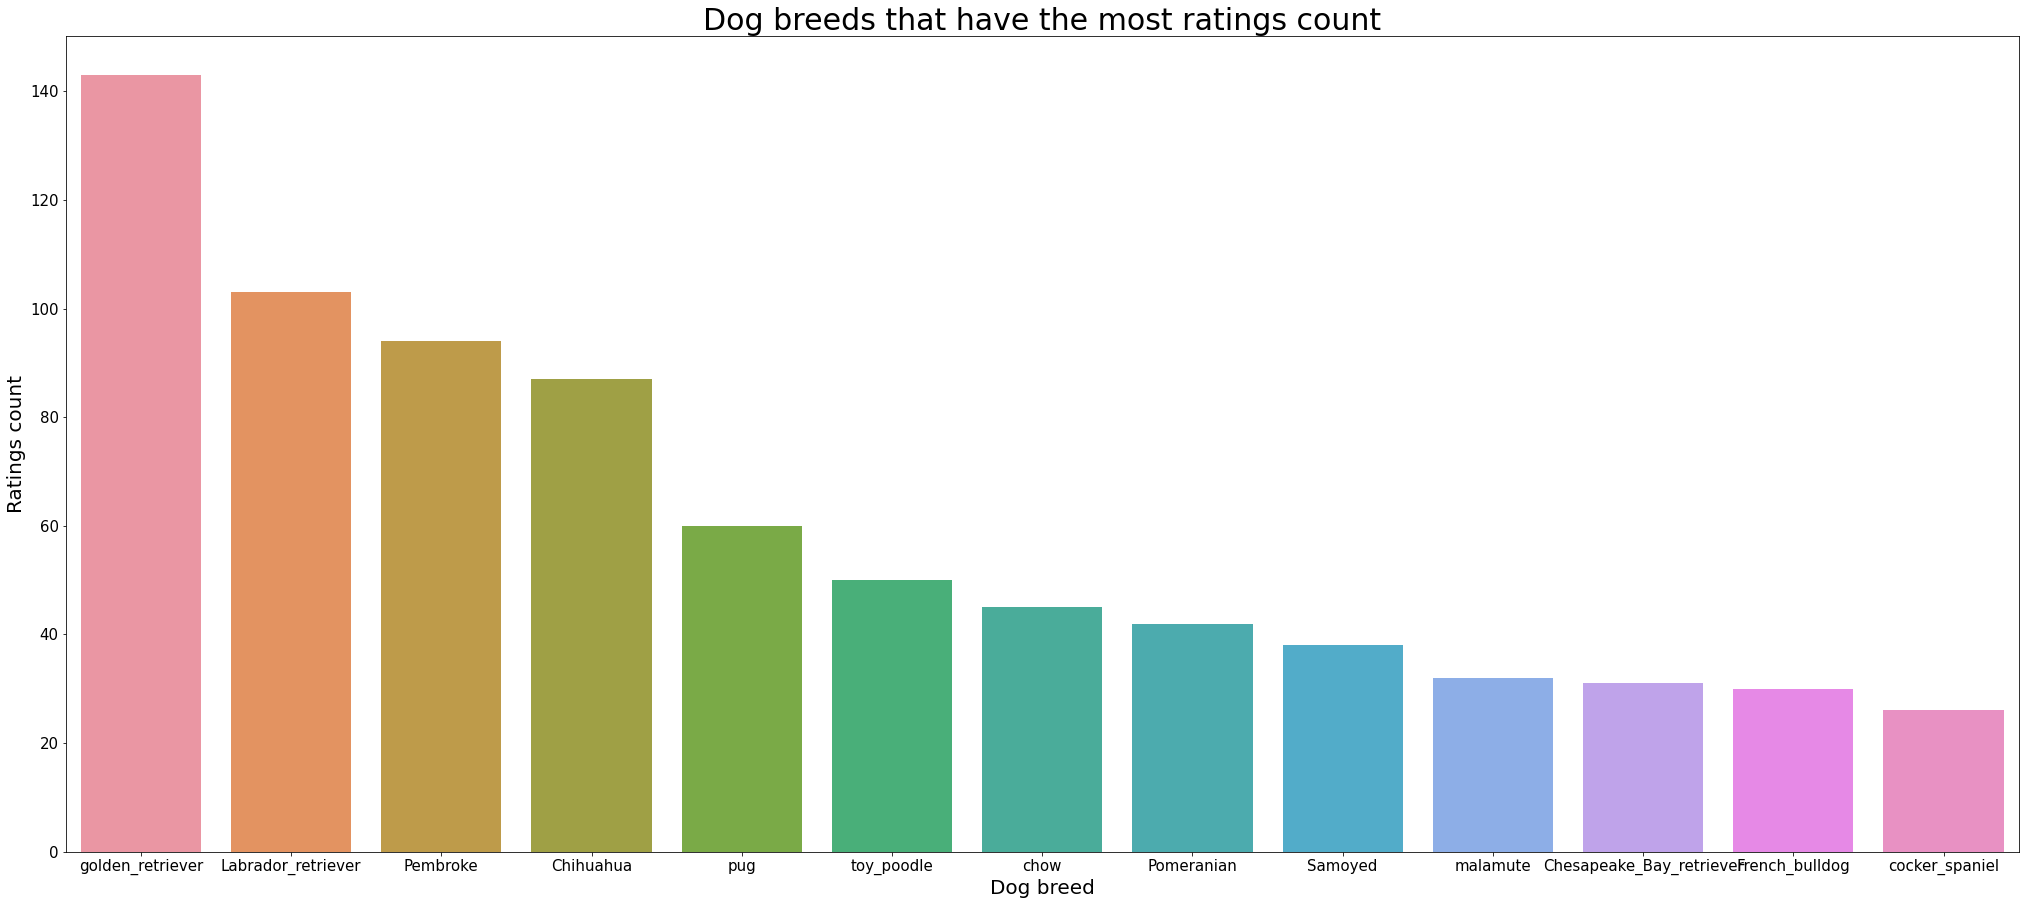

In [157]:
df_dog_breed = df.groupby('dog_breed').filter(lambda x: len(x) >= 25)
df_dog_breed = df_dog_breed['dog_breed'].value_counts()
plt.figure(figsize = (35, 15))
sns.barplot(df_dog_breed.index, df_dog_breed.values, alpha=1)
plt.title('Dog breeds that have the most ratings count', fontsize=30)
plt.xlabel('Dog breed', fontsize=20)
plt.ylabel('Ratings count', fontsize=20)
plt.tick_params(labelsize=15)
plt.savefig('Dog_breeds_ratings_count');

### 2. Get the retweet counts by ratings

#### Analysis

In [1423]:
df[['rating(out_of_10_per_dog)', 'retweet_count']]

,rating(out_of_10_per_dog),retweet_count
0,7.0,206.0
1,12.0,79.0
2,11.0,81.0
3,7.0,56.0
4,11.0,89.0
...,...,...
1621,12.0,2726.0
1622,12.0,2262.0
1623,13.0,3634.0
1624,14.0,17277.0


#### Visualization

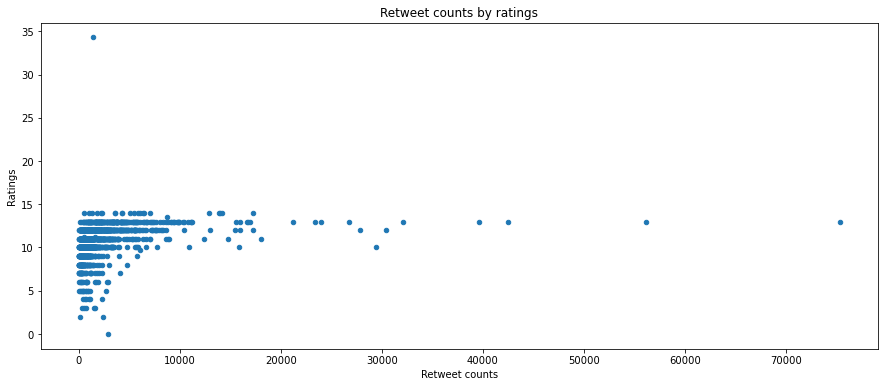

In [158]:
df.plot(x='retweet_count', y= 'rating(out_of_10_per_dog)', kind='scatter', figsize=(15,6))
plt.title('Retweet counts by ratings')
plt.xlabel('Retweet counts')
plt.ylabel('Ratings')
plt.savefig('Retweet_counts_by_rating');

### 3. Get the trend of WeRateDogs tweets

#### Analysis

In [1406]:
# Source: https://stackoverflow.com/questions/45858155/removing-the-timestamp-from-a-datetime-in-pandas-dataframe
df['date'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    223
2015-12    282
2016-01    139
2016-02     95
2016-03    105
2016-04     49
2016-05     46
2016-06     66
2016-07     77
2016-08     43
2016-09     50
2016-10     50
2016-11     40
2016-12     50
2017-01     54
2017-02     57
2017-03     44
2017-04     34
2017-05     35
2017-06     41
2017-07     45
2017-08      1
Name: date, dtype: int64

#### Visulaization

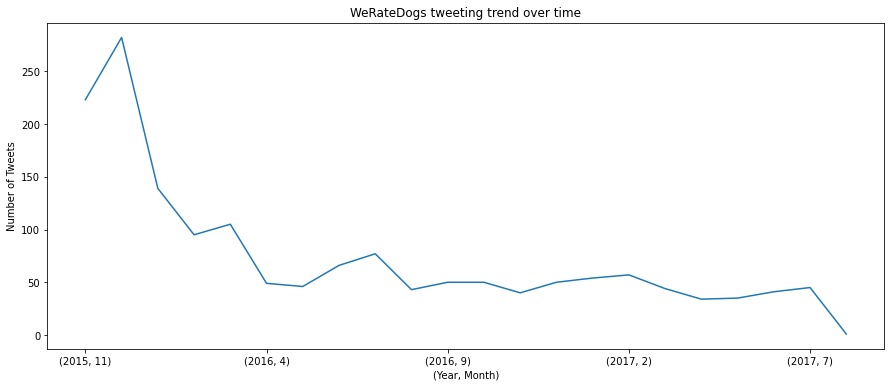

In [159]:
trend = df.tweet_id.groupby([df["date"].dt.year, df["date"].dt.month]).count()
trend.plot(kind = 'line' , figsize = (15,6))
plt.title('WeRateDogs tweeting trend over time')
plt.xlabel("(Year, Month)")
plt.ylabel("Number of Tweets")
plt.savefig('Trend_of_tweets');

### 4. Get the rating distribution

#### Analysis

In [1482]:
df['rating(out_of_10_per_dog)'].value_counts()

12.000000    407
10.000000    355
11.000000    349
13.000000    212
9.000000     134
8.000000      68
7.000000      31
14.000000     22
6.000000      16
5.000000      13
4.000000       6
3.000000       5
2.000000       2
11.260000      1
13.500000      1
9.750000       1
0.000000       1
34.285714      1
11.270000      1
Name: rating(out_of_10_per_dog), dtype: int64

In [1481]:
df.loc[df['rating(out_of_10_per_dog)'] == 34.285714285714285]

,tweet_id,source,text,date,exact_hour,exact_minute,exact_second,favourite_count,retweet_count,retweeted_status,name,rating(out_of_10_per_dog),dog_stage,dog_breed,confidence_level,jpg_url,url
860,810984652412424192,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,2016-12-19,23,6,23,5304.0,1430.0,Original tweet,Sam,34.285714,None,golden_retriever,0.871342,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [1480]:
df.loc[df['rating(out_of_10_per_dog)'] == 0]

,tweet_id,source,text,date,exact_hour,exact_minute,exact_second,favourite_count,retweet_count,retweeted_status,name,rating(out_of_10_per_dog),dog_stage,dog_breed,confidence_level,jpg_url,url
1133,835152434251116546,Twitter for iPhone,When you're so blinded by your systematic plag...,2017-02-24,15,40,31,21943.0,2916.0,Original tweet,None,0.0,None,American_Staffordshire_terrier,0.012731,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,https://t.co/YbEJPkg4Ag


#### Visualization

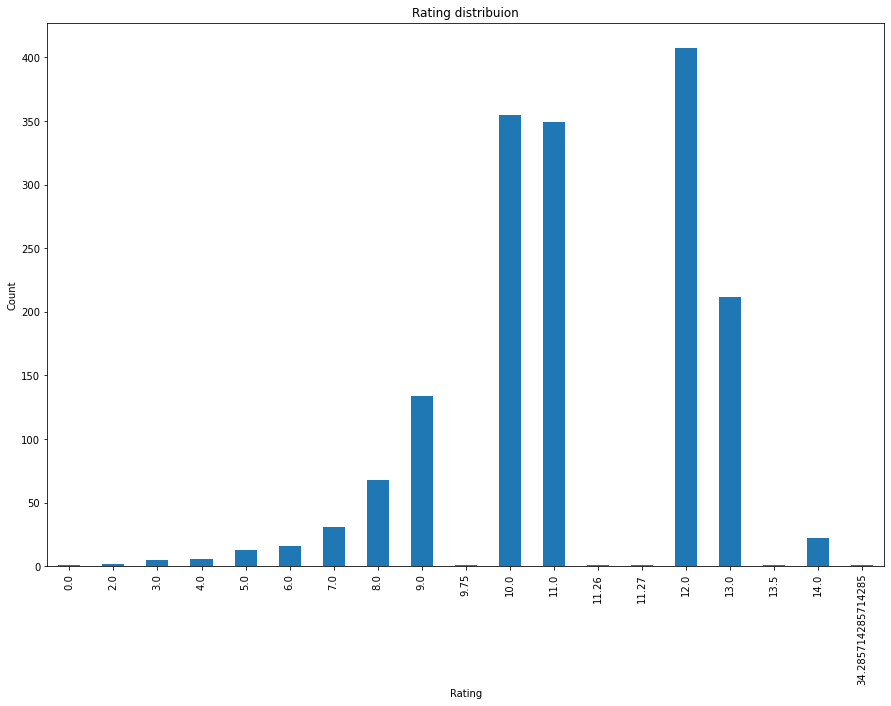

In [160]:
rates = df['rating(out_of_10_per_dog)'].value_counts().sort_index() 
rates.plot(kind = 'bar', figsize = (15,10))
plt.title('Rating distribuion')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('Rating_distribution')

### 5. Get the trend of favourite and retweet counts on WeRateDogs

#### Analysis

In [117]:
print('The mean retweet count {}'.format(int(df.retweet_count.mean())))
print('The mean favourites count {}'.format(int(df.favourite_count.mean())))

The mean retweet count 2198
The mean favourites count 7813


#### Visualization

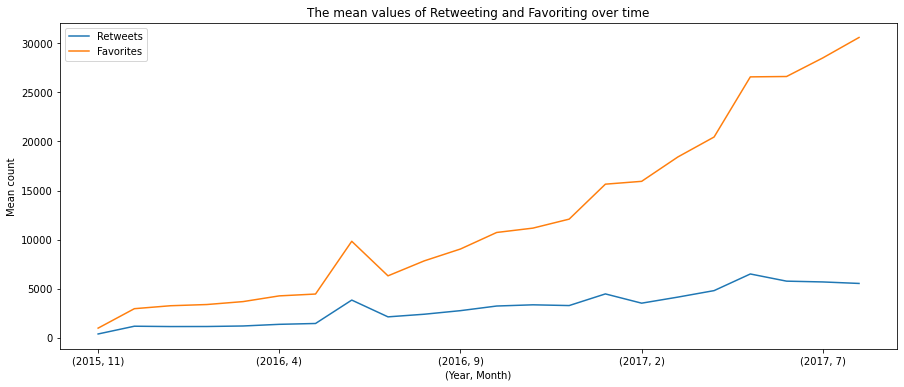

In [181]:
x = df.retweet_count.groupby([df["date"].dt.year, df["date"].dt.month]).mean()
y = df.favourite_count.groupby([df["date"].dt.year, df["date"].dt.month]).mean()
x.plot(kind = 'line', figsize = (15, 6))
y.plot(kind = 'line', figsize = (15, 6))
plt.title("The mean values of Retweeting and Favoriting over time")
plt.xlabel("(Year, Month)")
plt.ylabel("Mean count")
plt.legend(("Retweets", "Favorites"));

### 6. Get the most common dog names

#### Analysis

In [1424]:
df.name.value_counts()

None        483
Lucy         10
Cooper       10
Charlie      10
Oliver        9
           ... 
Hermione      1
Tuco          1
Julio         1
Taco          1
Creg          1
Name: name, Length: 810, dtype: int64

#### Visualization

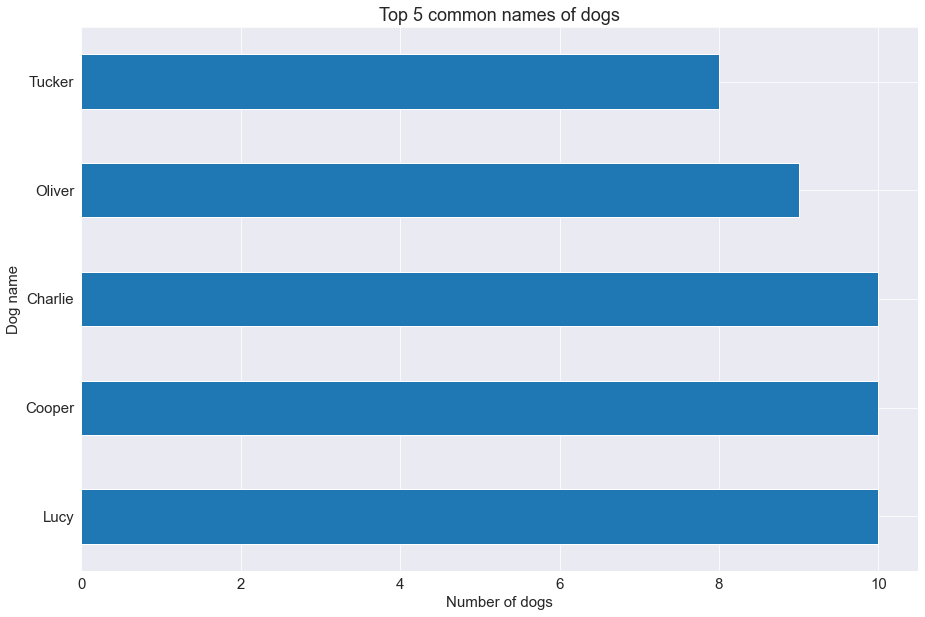

In [1434]:
trendy_name = df.name.value_counts()[1:6]
trendy_name.plot(kind = 'barh', figsize = (15,10))
plt.title('Top 5 common names of dogs')
plt.xlabel('Number of dogs')
plt.ylabel('Dog name')
plt.savefig('Most_common_names');

### Extra: Prediction Model for dog breed

In [1821]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [1823]:
df_copy = df.copy()

In [1667]:
df_copy.dog_stage.value_counts()

None       1375
pupper      171
doggo        51
puppo        21
floofer       8
Name: dog_stage, dtype: int64

In [1692]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1375 to 1625
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   tweet_id                   251 non-null    int64   
 1   source                     251 non-null    category
 2   text                       251 non-null    object  
 3   date                       251 non-null    object  
 4   exact_hour                 251 non-null    int64   
 5   exact_minute               251 non-null    int64   
 6   exact_second               251 non-null    int64   
 7   favourite_count            251 non-null    float64 
 8   retweet_count              251 non-null    float64 
 9   retweeted_status           251 non-null    object  
 10  name                       251 non-null    object  
 11  rating(out_of_10_per_dog)  251 non-null    float64 
 12  dog_stage                  251 non-null    int64   
 13  dog_breed                  251 

In [1824]:
df_copy = df_copy[df_copy['dog_stage'] != 'None']

In [1825]:
# To avoid the error at prediction
df_copy.dog_stage.replace({'pupper': 1, 'doggo': 2, 'puppo':3, 'floofer': 4}, inplace = True)

In [1826]:
df_copy = df_copy.dropna()

In [1709]:
df_copy.head(50)

,tweet_id,source,text,date,exact_hour,exact_minute,exact_second,favourite_count,retweet_count,retweeted_status,name,rating(out_of_10_per_dog),dog_stage,dog_breed,confidence_level,jpg_url,url
1375,858843525470990336,Twitter for iPhone,I have stumbled puppon a doggo painting party....,2017-05-01,0,40,27,14733.0,3215.0,Original tweet,None,13.0,2,golden_retriever,0.578120,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,https://t.co/cUeDMlHJbq
1376,826848821049180160,Twitter for iPhone,This is Cupid. He was found in the trash. Now ...,2017-02-01,17,44,55,35807.0,9954.0,Original tweet,Cupid,13.0,2,Great_Pyrenees,0.858764,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,https://t.co/WS0Gha8vRh
1377,719991154352222208,Twitter for iPhone,This doggo was initially thrilled when she saw...,2016-04-12,20,50,42,4685.0,1680.0,Original tweet,None,10.0,2,golden_retriever,0.605304,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,https://t.co/mvnBGaWULV
1378,869596645499047938,Twitter for iPhone,This is Scout. He just graduated. Officially a...,2017-05-30,16,49,31,14830.0,2806.0,Original tweet,Scout,12.0,2,Chihuahua,0.955156,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,https://t.co/DsA2hwXAJo
1379,871515927908634625,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,2017-06-04,23,56,3,18697.0,3122.0,Original tweet,Napolean,12.0,2,komondor,0.974781,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,https://t.co/PR7B7w1rUw
1380,884162670584377345,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,2017-07-09,21,29,42,18747.0,2651.0,Original tweet,Yogi,12.0,2,German_shepherd,0.707046,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,https://t.co/YSI00BzTBZ
1381,724771698126512129,Twitter for iPhone,Nothin better than a doggo and a sunset. 11/10...,2016-04-26,1,26,53,2273.0,609.0,Original tweet,None,11.0,2,German_short-haired_pointer,0.835491,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,https://t.co/JlFqOhrHEs
1382,828381636999917570,Twitter for iPhone,Meet Doobert. He's a deaf doggo. Didn't stop h...,2017-02-05,23,15,47,12421.0,2176.0,Original tweet,Doobert,14.0,2,Bedlington_terrier,0.392535,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,https://t.co/iCk7zstRA9
1383,834574053763584002,Twitter for iPhone,Here's a doggo fully pupared for a shower. H*c...,2017-02-23,1,22,14,13401.0,2456.0,Original tweet,None,13.0,2,golden_retriever,0.226564,https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg,https://t.co/UtEVnQ1ZPg
1384,836753516572119041,Twitter for iPhone,This is Meera. She just heard about taxes and ...,2017-03-01,1,42,39,18975.0,4519.0,Original tweet,Meera,12.0,2,schipperke,0.011564,https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg,https://t.co/GZmNEdyoJY


In [1827]:
# The values that we will predict upon
feature_names = ['retweet_count', 'favourite_count','dog_stage','rating(out_of_10_per_dog)', 'confidence_level'] 
# The values that we will predict
target_name = 'dog_breed'  

In [1828]:
x = df_copy[feature_names]
y = df_copy[target_name]

In [1698]:
x[x.isna().any(axis=1)]

,favourite_count,dog_stage,retweet_count,rating(out_of_10_per_dog),confidence_level


In [1595]:
y.head()

0         Saint_Bernard
1            Rottweiler
2    Labrador_retriever
3       Tibetan_terrier
4            toy_poodle
Name: dog_breed, dtype: object

In [1699]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1375 to 1625
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   favourite_count            251 non-null    float64
 1   dog_stage                  251 non-null    int64  
 2   retweet_count              251 non-null    float64
 3   rating(out_of_10_per_dog)  251 non-null    float64
 4   confidence_level           251 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


### Split the data into: trainig and testing (cross-validation)

In [1831]:
model = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.20)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
prediction

array(['pug', 'Pomeranian', 'Rottweiler', 'golden_retriever', 'briard',
       'Chihuahua', 'golden_retriever', 'Pomeranian', 'golden_retriever',
       'pug', 'Irish_water_spaniel', 'vizsla', 'Rhodesian_ridgeback',
       'Chihuahua', 'German_shepherd', 'malamute', 'Pembroke', 'Cardigan',
       'Siberian_husky', 'Eskimo_dog', 'curly-coated_retriever',
       'Samoyed', 'pug', 'chow', 'golden_retriever', 'Siberian_husky',
       'wire-haired_fox_terrier', 'Brittany_spaniel', 'Samoyed',
       'Pomeranian', 'French_bulldog', 'wire-haired_fox_terrier',
       'Mexican_hairless', 'Pembroke', 'Italian_greyhound', 'dalmatian',
       'papillon', 'Great_Pyrenees', 'French_bulldog', 'chow', 'malamute',
       'Labrador_retriever', 'toy_poodle', 'Pomeranian',
       'Labrador_retriever', 'French_bulldog', 'dalmatian', 'Pomeranian',
       'golden_retriever', 'Shih-Tzu', 'Chihuahua'], dtype=object)

In [1811]:
x_test

,retweet_count,favourite_count,dog_stage,rating(out_of_10_per_dog),confidence_level
1397,2103.0,9511.0,2,11.0,0.856590
1611,5595.0,15210.0,3,12.0,0.654762
1599,712.0,2421.0,1,12.0,0.949609
1427,15599.0,29558.0,4,13.0,0.940326
1468,1080.0,2553.0,1,9.0,0.738449
1581,817.0,2371.0,1,9.0,0.956063
1447,1069.0,3928.0,1,12.0,0.462594
1466,589.0,2907.0,1,11.0,0.731405
1541,570.0,1253.0,1,9.0,0.755945
1499,2201.0,8784.0,1,12.0,0.426183


In [1791]:
len(prediction)

26

In [1812]:
# The accuracy of the prediction model
score = accuracy_score(y_test, prediction)
score

0.058823529411764705

##### Sources
- https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
- https://stackoverflow.com/questions/12943819/how-to-prettyprint-a-json-file
- https://github.com/tweepy/tweepy/issues/1102
- https://github.com/gouravaich/wrangle-analyze-weratedogs-twitter/blob/master/Solution.ipynb
- https://github.com/pandas-dev/pandas/issues/35227
- https://stackoverflow.com/questions/45858155/removing-the-timestamp-from-a-datetime-in-pandas-dataframe